In [1]:
import pandas as pd
import numpy as np
import statistics as s
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
asiacup = pd.read_csv('/asiacup.csv')

In [3]:
asiacup

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,India,Afghanistan,T20I,Dubai(DSC),2022,Lose,Batting,212.0,2.0,21.0,9.0,2.0,10.60,194.05,122.0,8.0,3.0,5.0,Virat Kohli,Win
250,Pakistan,Sri Lanka,T20I,Dubai(DSC),2022,Lose,Batting,121.0,10.0,4.0,3.0,17.0,6.31,58.78,30.0,5.0,5.0,2.0,Wanindu Hasaranga de Silva,Lose
251,Sri Lanka,Pakistan,T20I,Dubai(DSC),2022,Win,Bowling,124.0,5.0,9.0,5.0,5.0,7.29,111.50,55.0,10.0,17.0,3.0,Wanindu Hasaranga de Silva,Win
252,Pakistan,Sri Lanka,T20I,Dubai(DSC),2022,Win,Bowling,147.0,10.0,9.0,4.0,14.0,7.35,99.38,55.0,6.0,10.0,3.0,Bhanuka Rajapaksa,Lose


In [4]:
asiacup.columns

Index(['Team', 'Opponent', 'Format', 'Ground', 'Year', 'Toss', 'Selection',
       'Run Scored', 'Wicket Lost', 'Fours', 'Sixes', 'Extras', 'Run Rate',
       'Avg Bat Strike Rate', 'Highest Score', 'Wicket Taken', 'Given Extras',
       'Highest Individual wicket', 'Player Of The Match', 'Result'],
      dtype='object')

In [5]:
asiacup.isnull().sum()

,0
Team,0
Opponent,0
Format,0
Ground,0
Year,0
Toss,0
Selection,0
Run Scored,2
Wicket Lost,2
Fours,2


In [6]:
asiacup = asiacup.dropna()

In [7]:
asiacup.isnull().sum()

,0
Team,0
Opponent,0
Format,0
Ground,0
Year,0
Toss,0
Selection,0
Run Scored,0
Wicket Lost,0
Fours,0


In [9]:
asiacup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 253
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       252 non-null    object 
 1   Opponent                   252 non-null    object 
 2   Format                     252 non-null    object 
 3   Ground                     252 non-null    object 
 4   Year                       252 non-null    int64  
 5   Toss                       252 non-null    object 
 6   Selection                  252 non-null    object 
 7   Run Scored                 252 non-null    float64
 8   Wicket Lost                252 non-null    float64
 9   Fours                      252 non-null    float64
 10  Sixes                      252 non-null    float64
 11  Extras                     252 non-null    float64
 12  Run Rate                   252 non-null    float64
 13  Avg Bat Strike Rate        252 non-null    float64
 14 

In [ ]:
asiacup.describe()

,Year,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2006.984127,201.920635,6.892857,15.626984,2.912698,13.238095,5.308214,76.676667,69.309524,6.892857,13.238095,2.563492
std,11.022602,67.331860,2.874609,7.754946,2.596411,7.621973,1.584823,30.678228,29.813488,2.874609,7.621973,1.100496
min,1984.000000,38.000000,0.000000,0.000000,0.000000,0.000000,2.200000,24.630000,8.000000,0.000000,0.000000,0.000000
25%,2000.000000,147.000000,5.000000,10.000000,1.000000,8.000000,4.227500,54.742500,47.000000,5.000000,8.000000,2.000000
50%,2008.000000,193.000000,7.000000,15.000000,2.000000,12.000000,5.090000,73.155000,66.500000,7.000000,12.000000,3.000000
75%,2016.000000,253.250000,10.000000,20.000000,4.250000,18.000000,6.100000,92.897500,85.000000,10.000000,18.000000,3.000000
max,2022.000000,385.000000,10.000000,41.000000,14.000000,38.000000,10.600000,194.050000,183.000000,10.000000,38.000000,6.000000


In [10]:
asiacup_odi = asiacup[asiacup['Format'] == 'ODI']
asiacup_odi

,Team,Opponent,Format,Ground,Year,Toss,Selection,Run Scored,Wicket Lost,Fours,Sixes,Extras,Run Rate,Avg Bat Strike Rate,Highest Score,Wicket Taken,Given Extras,Highest Individual wicket,Player Of The Match,Result
0,Pakistan,Sri Lanka,ODI,Sharjah,1984,Lose,Batting,187.0,9.0,9.0,3.0,21.0,4.06,52.04,47.0,5.0,26.0,2.0,Roy Dias,Lose
1,Sri Lanka,Pakistan,ODI,Sharjah,1984,Win,Bowling,190.0,5.0,11.0,1.0,26.0,4.36,68.51,57.0,9.0,21.0,3.0,Roy Dias,Win
2,India,Sri Lanka,ODI,Sharjah,1984,Win,Bowling,97.0,0.0,9.0,0.0,14.0,4.47,60.48,51.0,10.0,8.0,3.0,Surinder Khanna,Win
3,Sri Lanka,India,ODI,Sharjah,1984,Lose,Batting,96.0,10.0,7.0,0.0,8.0,2.34,25.74,38.0,0.0,14.0,0.0,Surinder Khanna,Lose
4,India,Pakistan,ODI,Sharjah,1984,Win,Batting,188.0,4.0,13.0,3.0,17.0,4.08,60.21,56.0,10.0,5.0,3.0,Surinder Khanna,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,India,Afghanistan,ODI,Dubai(DSC),2018,Lose,Bowling,252.0,10.0,17.0,5.0,9.0,5.05,71.67,60.0,8.0,7.0,3.0,Mohammad Shahzad,No Result
224,Bangladesh,Pakistan,ODI,Abu Dhabi,2018,Win,Batting,239.0,10.0,17.0,1.0,9.0,4.89,73.23,99.0,9.0,9.0,4.0,Mushfiqur Rahim,Win
225,Pakistan,Bangladesh,ODI,Abu Dhabi,2018,Lose,Bowling,202.0,9.0,10.0,2.0,9.0,4.04,60.59,83.0,10.0,9.0,4.0,Mushfiqur Rahim,Lose
226,Bangladesh,India,ODI,Dubai(DSC),2018,Lose,Batting,222.0,10.0,17.0,4.0,7.0,4.57,49.98,121.0,7.0,13.0,2.0,Litton Das,Lose


# ODI ANALYSIS

In [11]:
asiacup_odi.shape

(204, 20)

In [12]:
asiacup_odi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 227
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       204 non-null    object 
 1   Opponent                   204 non-null    object 
 2   Format                     204 non-null    object 
 3   Ground                     204 non-null    object 
 4   Year                       204 non-null    int64  
 5   Toss                       204 non-null    object 
 6   Selection                  204 non-null    object 
 7   Run Scored                 204 non-null    float64
 8   Wicket Lost                204 non-null    float64
 9   Fours                      204 non-null    float64
 10  Sixes                      204 non-null    float64
 11  Extras                     204 non-null    float64
 12  Run Rate                   204 non-null    float64
 13  Avg Bat Strike Rate        204 non-null    float64
 14 

In [15]:
win_loss = asiacup_odi.groupby(['Team', 'Result']).size().unstack(fill_value=0)
win_loss['win_loss_ratio'] = win_loss['Win'] / win_loss['Lose']
win_loss

Result,Lose D/L,Win D/L,Lose,No Result,Win,win,win_loss_ratio
Team,,,,,,,
Afghanistan,0,0,5,1,3,0,0.600000
Bangladesh,0,1,36,0,6,0,0.166667
Hong Kong,0,0,6,0,0,0,0.000000
India,0,0,16,1,31,0,1.937500
Pakistan,0,0,18,0,26,0,1.444444
Sri Lanka,1,0,15,0,33,1,2.200000
UAE,0,0,4,0,0,0,0.000000


In [14]:
head_to_head = asiacup_odi.groupby(['Team', 'Opponent', 'Result']).size().unstack(fill_value=0)
head_to_head

Result                    Lose D/L   Win D/L  Lose  No Result  Win  win
Team        Opponent                                                   
Afghanistan Bangladesh           0         0     1          0    2    0
            India                0         0     1          1    0    0
            Pakistan             0         0     2          0    0    0
            Sri Lanka            0         0     1          0    1    0
Bangladesh  Afghanistan          0         0     2          0    1    0
            Hong Kong            0         0     0          0    1    0
            India                0         0    11          0    1    0
            Pakistan             0         0    12          0    1    0
            Sri Lanka            0         1    11          0    1    0
            UAE                  0         0     0          0    1    0
Hong Kong   Bangladesh           0         0     1          0    0    0
            India                0         0     2          0    0    0
            Pakistan             0         0     3          0    0    0
India       Afghanistan          0         0     0          1    1    0
            Bangladesh           0         0     1          0   11    0
            Hong Kong            0         0     0          0    2    0
            Pakistan             0         0     5          0    7    0
            Sri Lanka            0         0    10          0    9    0
            UAE                  0         0     0          0    1    0
Pakistan    Afghanistan          0         0     0          0    2    0
            Bangladesh           0         0     1          0   12    0
            Hong Kong            0         0     0          0    3    0
            India                0         0     7          0    5    0
            Sri Lanka            0         0    10          0    4    0
Sri Lanka   Afghanistan          0         0     1          0    1    0
            Bangladesh           1         0     1          0   10    1
            India                0         0     9          0   10    0
            Pakistan             0         0     4          0   10    0
            UAE                  0         0     0          0    2    0
UAE         Bangladesh           0         0     1          0    0    0
            India                0         0     1          0    0    0
            Sri Lanka            0         0     2          0    0    0

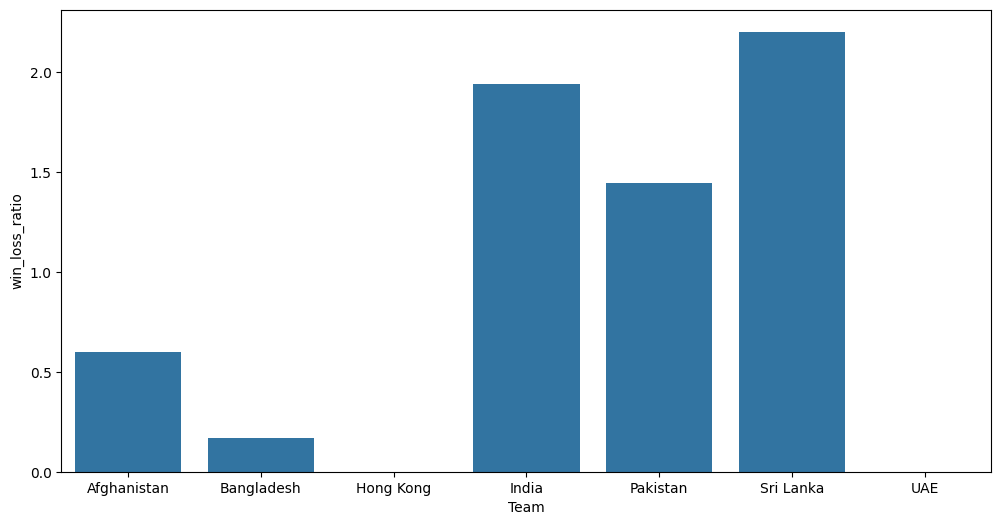

In [16]:
win_loss['Team'] = win_loss.index.get_level_values('Team')
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='win_loss_ratio', data=win_loss)
plt.show()

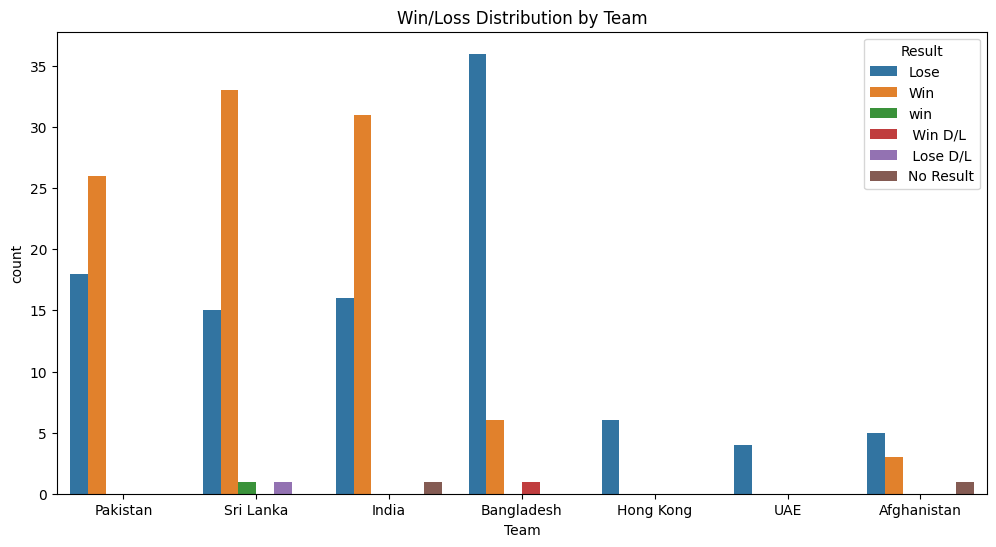

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Team', hue='Result', data=asiacup_odi)
plt.title('Win/Loss Distribution by Team')
plt.show()

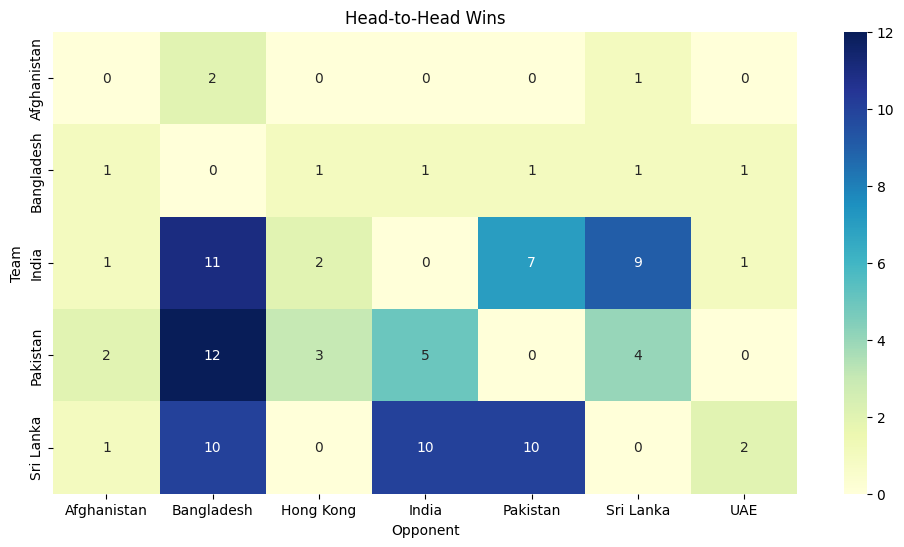

In [18]:
plt.figure(figsize=(12, 6))
head_to_head = asiacup_odi[asiacup_odi['Result'] == 'Win'].groupby(['Team', 'Opponent']).size().unstack(fill_value=0)
sns.heatmap(head_to_head, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Head-to-Head Wins')
plt.show()

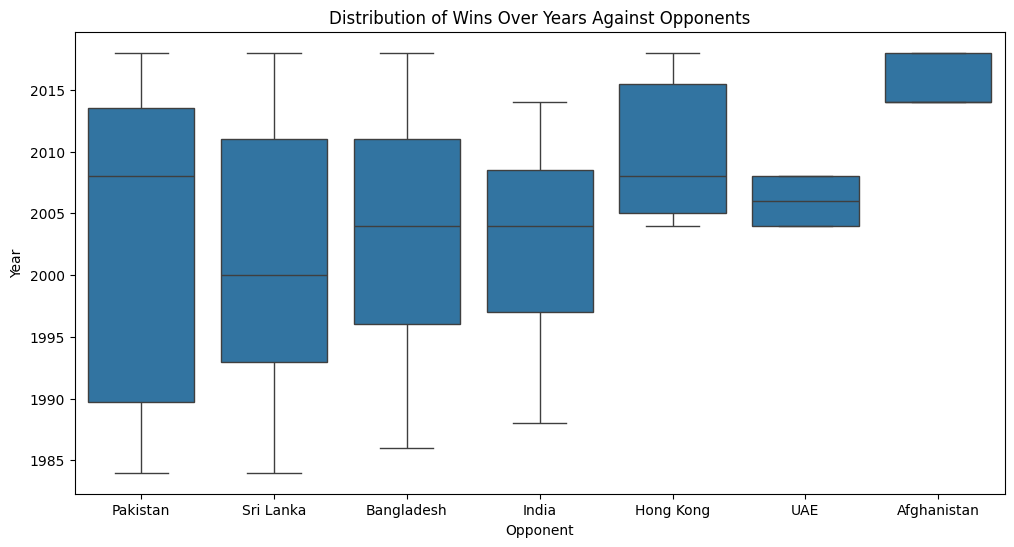

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Opponent', y='Year', data=asiacup_odi[asiacup_odi['Result'] == 'Win'])
plt.title('Distribution of Wins Over Years Against Opponents')
plt.show()

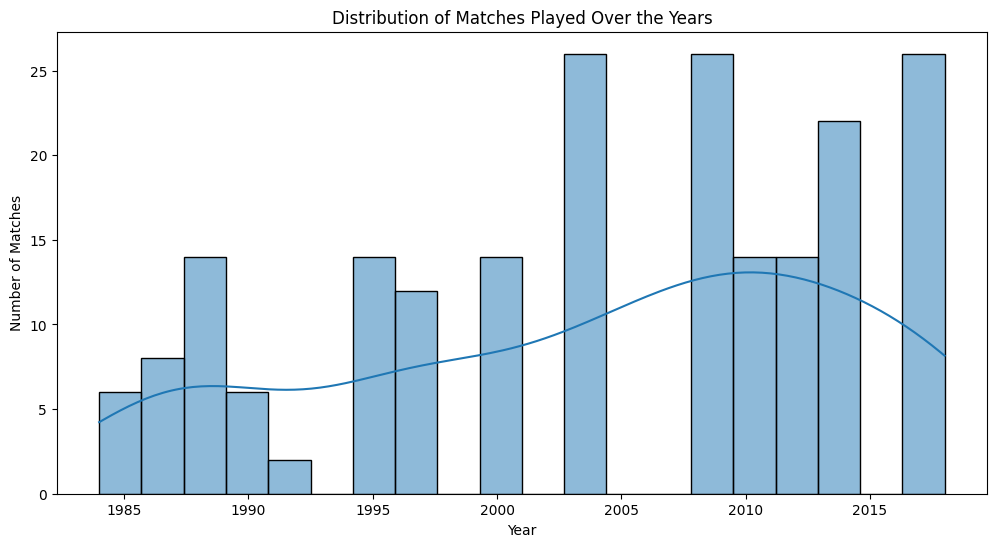

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(asiacup_odi['Year'], bins=20, kde=True)
plt.title('Distribution of Matches Played Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

<Figure size 1200x600 with 0 Axes>

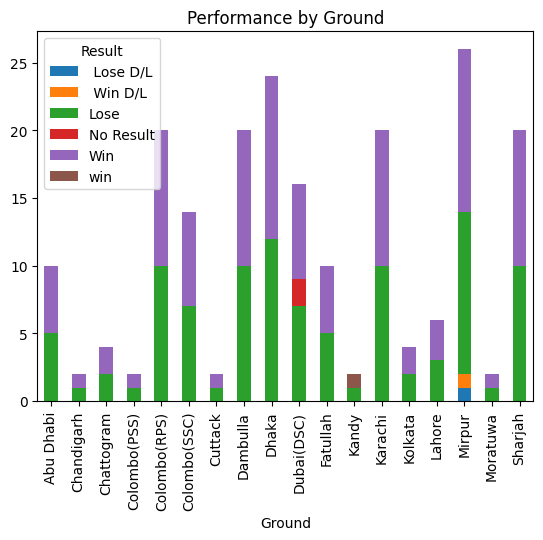

In [21]:
plt.figure(figsize=(12, 6))
ground_performance = asiacup_odi.groupby(['Ground', 'Result']).size().unstack(fill_value=0)
ground_performance.plot(kind='bar', stacked=True)
plt.title('Performance by Ground')
plt.show()

<Figure size 1200x600 with 0 Axes>

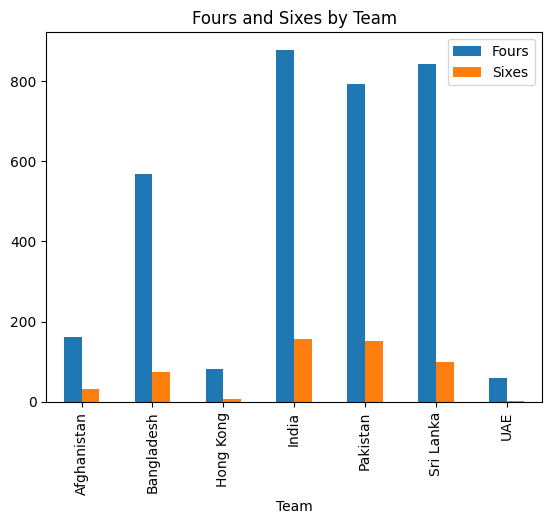

In [22]:
plt.figure(figsize=(12, 6))
boundaries = asiacup_odi.groupby('Team')[['Fours', 'Sixes']].sum()
boundaries.plot(kind='bar', stacked=False)
plt.title('Fours and Sixes by Team')
plt.show()

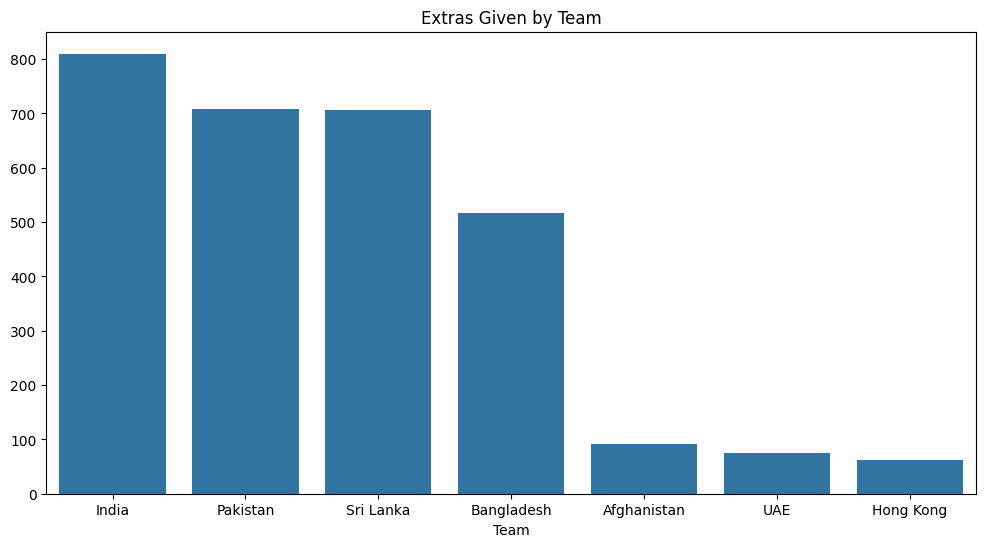

In [23]:
plt.figure(figsize=(12, 6))
extras_given = asiacup_odi.groupby('Team')['Given Extras'].sum().sort_values(ascending=False)
sns.barplot(x=extras_given.index, y=extras_given.values)
plt.title('Extras Given by Team')
plt.show()

<Figure size 1200x800 with 0 Axes>

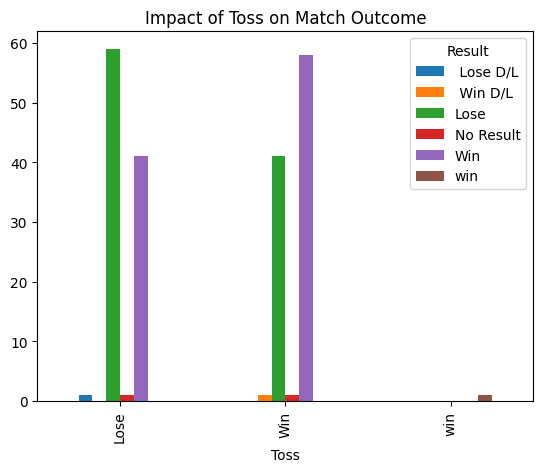

In [24]:
plt.figure(figsize=(12, 8))
toss_effect = asiacup_odi.groupby(['Toss', 'Result']).size().unstack(fill_value=0)
toss_effect.plot(kind='bar', stacked=False)
plt.title('Impact of Toss on Match Outcome')
plt.show()

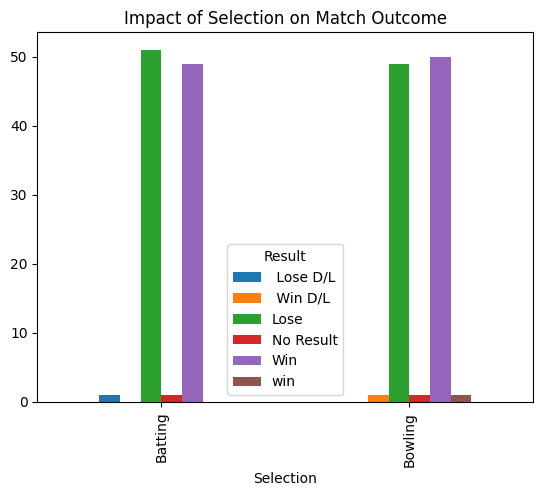

In [25]:
selection_effect = asiacup_odi.groupby(['Selection', 'Result']).size().unstack(fill_value=0)
selection_effect.plot(kind='bar', stacked=False)
plt.title('Impact of Selection on Match Outcome')
plt.show()

##Lets Predict By Using XGBoost , Random Forest

# Task
Predict wins using XGBoost and Random Forest models based on the provided data.

## Prepare data

### Subtask:
Preprocess the data for model training, including encoding categorical features and splitting into training and testing sets.


**Reasoning**:
The subtask requires preprocessing the data for model training, which involves selecting features, encoding categorical variables, defining features and target, converting the target to binary, and splitting the data. This can be achieved in a single code block.



In [45]:
asiacup_odi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 227
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Team                       204 non-null    object 
 1   Opponent                   204 non-null    object 
 2   Format                     204 non-null    object 
 3   Ground                     204 non-null    object 
 4   Year                       204 non-null    int64  
 5   Toss                       204 non-null    object 
 6   Selection                  204 non-null    object 
 7   Run Scored                 204 non-null    float64
 8   Wicket Lost                204 non-null    float64
 9   Fours                      204 non-null    float64
 10  Sixes                      204 non-null    float64
 11  Extras                     204 non-null    float64
 12  Run Rate                   204 non-null    float64
 13  Avg Bat Strike Rate        204 non-null    float64
 14 

In [42]:
from sklearn.model_selection import train_test_split

# Select relevant features
features = [col for col in asiacup_odi.columns if col not in ['Player Of The Match', 'Format']]
asiacup_processed = asiacup_odi[features]

# Convert categorical columns using one-hot encoding
categorical_cols = ['Team', 'Opponent', 'Ground', 'Toss', 'Selection']
asiacup_processed = pd.get_dummies(asiacup_processed, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = asiacup_processed.drop('Result', axis=1)
y = asiacup_processed['Result']

# Convert target to binary (Win = 1, others = 0)
y = y.apply(lambda x: 1 if x == 'Win' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (163, 44)
Shape of X_test: (41, 44)
Shape of y_train: (163,)
Shape of y_test: (41,)


In [44]:
asiacup_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 227
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       204 non-null    int64  
 1   Run Scored                 204 non-null    float64
 2   Wicket Lost                204 non-null    float64
 3   Fours                      204 non-null    float64
 4   Sixes                      204 non-null    float64
 5   Extras                     204 non-null    float64
 6   Run Rate                   204 non-null    float64
 7   Avg Bat Strike Rate        204 non-null    float64
 8   Highest Score              204 non-null    float64
 9   Wicket Taken               204 non-null    float64
 10  Given Extras               204 non-null    float64
 11  Highest Individual wicket  204 non-null    float64
 12  Result                     204 non-null    object 
 13  Team_Bangladesh            204 non-null    bool   
 14 

## Train xgboost model

### Subtask:
Train an XGBoost classifier on the training data.


**Reasoning**:
Train an XGBoost classifier on the training data.



In [46]:
import xgboost as xgb

# Instantiate XGBClassifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate xgboost model

### Subtask:
Evaluate the performance of the XGBoost model using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained XGBoost model using various classification metrics.



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Calculate ROC AUC score (requires predicted probabilities)
# If the model has predict_proba method
if hasattr(xgb_model, "predict_proba"):
    y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
else:
    roc_auc_xgb = None
    print("XGBoost model does not have predict_proba method.")


# Print the evaluation metrics
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
if roc_auc_xgb is not None:
    print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

XGBoost Model Evaluation:
Accuracy: 0.9024
Precision: 0.9600
Recall: 0.8889
F1-score: 0.9231
ROC AUC Score: 0.9550


## Train random forest model

### Subtask:
Train a Random Forest classifier on the training data.


**Reasoning**:
Train a Random Forest classifier on the training data.



In [48]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate random forest model

### Subtask:
Evaluate the performance of the Random Forest model.


**Reasoning**:
Make predictions using the trained Random Forest model, calculate evaluation metrics, and print them.



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Calculate ROC AUC score (requires predicted probabilities)
# If the model has predict_proba method
if hasattr(rf_model, "predict_proba"):
    y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
    roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
else:
    roc_auc_rf = None
    print("Random Forest model does not have predict_proba method.")

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
if roc_auc_rf is not None:
    print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Random Forest Model Evaluation:
Accuracy: 0.8537
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
ROC AUC Score: 0.9484


## Compare models

### Subtask:
Compare the performance of the two models.


**Reasoning**:
Print the evaluation metrics for both models and compare their performance.



In [50]:
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}")
if roc_auc_xgb is not None:
    print(f"ROC AUC Score: {roc_auc_xgb:.4f}")
print("\n")
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
if roc_auc_rf is not None:
    print(f"ROC AUC Score: {roc_auc_rf:.4f}")

print("\nModel Comparison:")
if accuracy_xgb > accuracy_rf:
    print("XGBoost has higher accuracy.")
elif accuracy_xgb < accuracy_rf:
    print("Random Forest has higher accuracy.")
else:
    print("Both models have the same accuracy.")

if precision_xgb > precision_rf:
    print("XGBoost has higher precision.")
elif precision_xgb < precision_rf:
    print("Random Forest has higher precision.")
else:
    print("Both models have the same precision.")

if recall_xgb > recall_rf:
    print("XGBoost has higher recall.")
elif recall_xgb < recall_rf:
    print("Random Forest has higher recall.")
else:
    print("Both models have the same recall.")

if f1_xgb > f1_rf:
    print("XGBoost has higher F1-score.")
elif f1_xgb < f1_rf:
    print("Random Forest has higher F1-score.")
else:
    print("Both models have the same F1-score.")

if roc_auc_xgb is not None and roc_auc_rf is not None:
    if roc_auc_xgb > roc_auc_rf:
        print("XGBoost has higher ROC AUC Score.")
    elif roc_auc_xgb < roc_auc_rf:
        print("Random Forest has higher ROC AUC Score.")
    else:
        print("Both models have the same ROC AUC Score.")

XGBoost Model Evaluation:
Accuracy: 0.9024
Precision: 0.9600
Recall: 0.8889
F1-score: 0.9231
ROC AUC Score: 0.9550


Random Forest Model Evaluation:
Accuracy: 0.8537
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
ROC AUC Score: 0.9484

Model Comparison:
XGBoost has higher accuracy.
XGBoost has higher precision.
Both models have the same recall.
XGBoost has higher F1-score.
XGBoost has higher ROC AUC Score.


## Summary:

### Data Analysis Key Findings

*   The dataset was preprocessed by selecting relevant features, applying one-hot encoding to categorical columns, and converting the target variable 'Result' into a binary format (Win = 1, others = 0).
*   The preprocessed data was split into training (163 samples, 44 features) and testing (41 samples, 44 features) sets.
*   The XGBoost model achieved an accuracy of 0.9024, a precision of 0.9600, a recall of 0.8889, an F1-score of 0.9231, and an ROC AUC Score of 0.9550 on the test set.
*   The Random Forest model achieved an accuracy of 0.8537, a precision of 0.8889, a recall of 0.8889, an F1-score of 0.8889, and an ROC AUC Score of 0.9484 on the test set.
*   The XGBoost model generally outperformed the Random Forest model across most evaluation metrics (Accuracy, Precision, F1-score, and ROC AUC Score).

### Insights or Next Steps

*   Based on the evaluation metrics, the XGBoost model is the preferred model for predicting wins in this dataset.
*   Further hyperparameter tuning could be performed on the XGBoost model to potentially improve its performance even further.


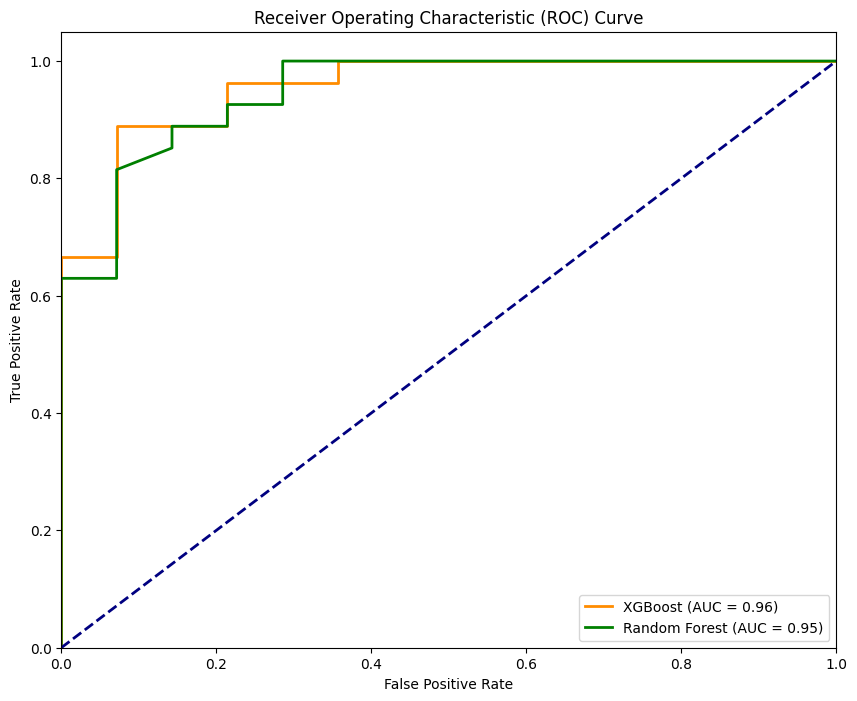

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

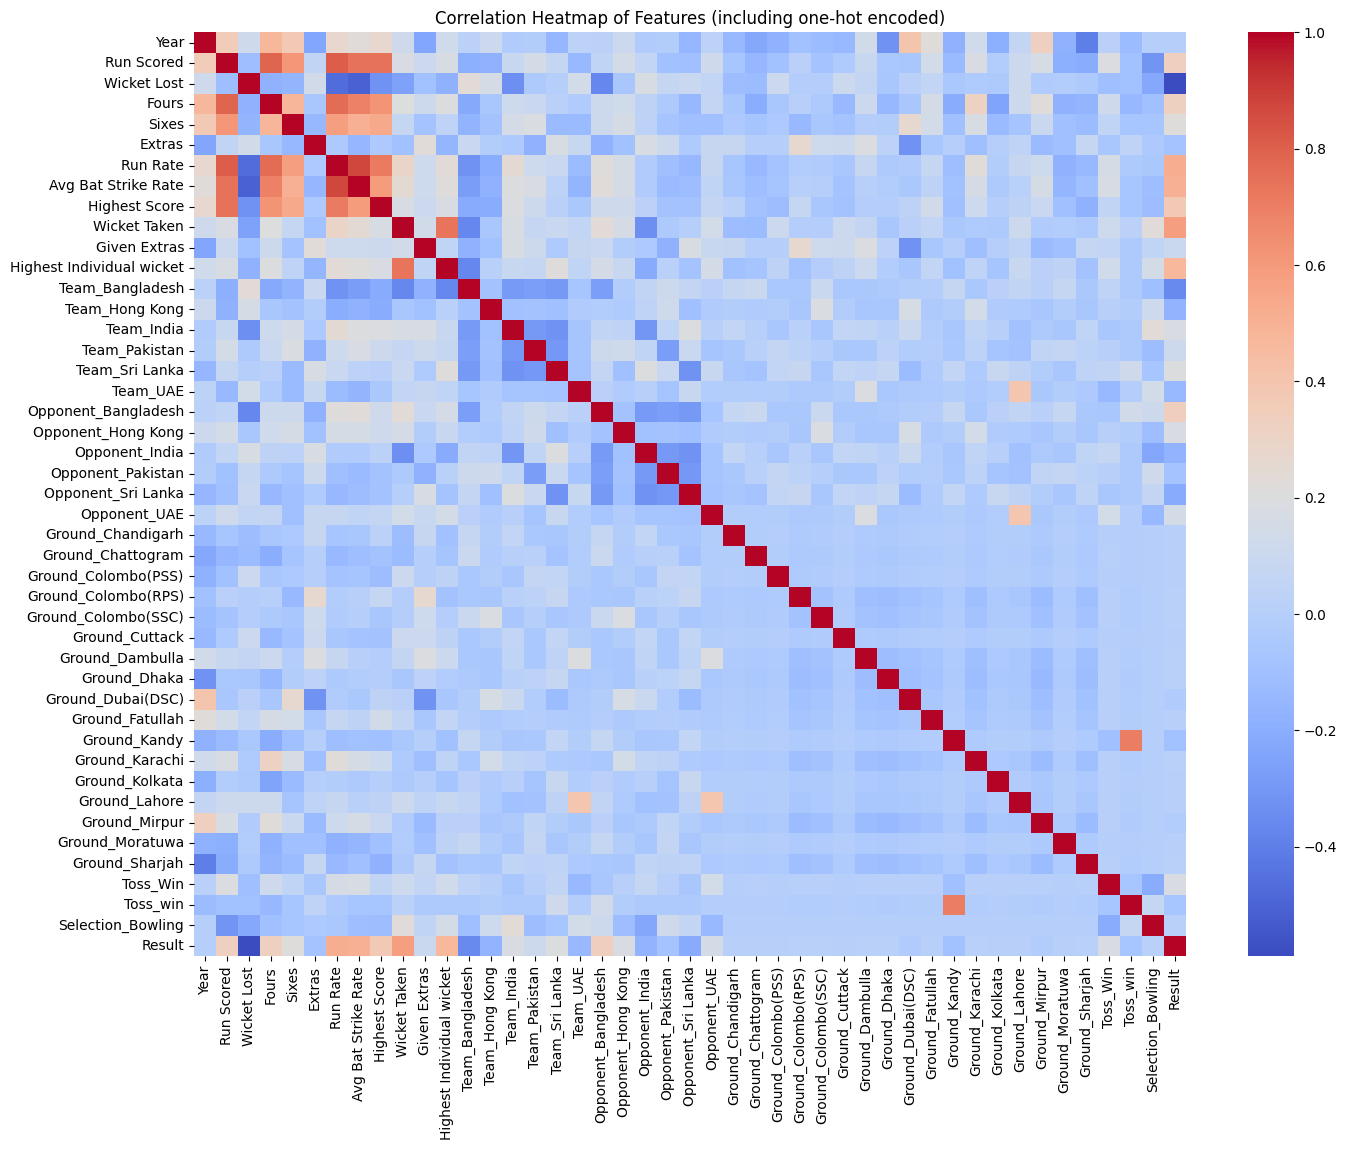

In [40]:
# Calculate the correlation matrix for the processed dataframe
correlation_matrix = asiacup_processed.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Features (including one-hot encoded)')
plt.show()